# managing SOFIAMIP simulation data: cmorization of raw data on $SCRATCH

In [5]:
import os
import sys
import shutil
# import fnmatch
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('..')

from ece_output import sofiamip_exps

## Overview of which data is cmorized; submit cmorization script if not
- the `! sbatch {subcmor} ...` line submits the cmorization script, if only the overview plot is of interest, then this can be commented out
- the `/perm/nkaj/ecearth/processing/cmorize/sub-cmor.sh` version is older than the `/hpcperm/nkaj/ecearth/processing/cmorize/sub-cmor.sh`

v20240404
v20240404
v20240404
v20240404
v20240404
cmorizing sf06 nemo 051 /perm/nkaj/ecearth/cmip6-fwf/runtime/classic/ctrl/output-control-files/sofiamip/faf-antwater-sofiamip AOGCM
v20240404
cmorizing sf06 ifs 051 /perm/nkaj/ecearth/cmip6-fwf/runtime/classic/ctrl/output-control-files/sofiamip/faf-antwater-sofiamip AOGCM
v20240404
v20240404


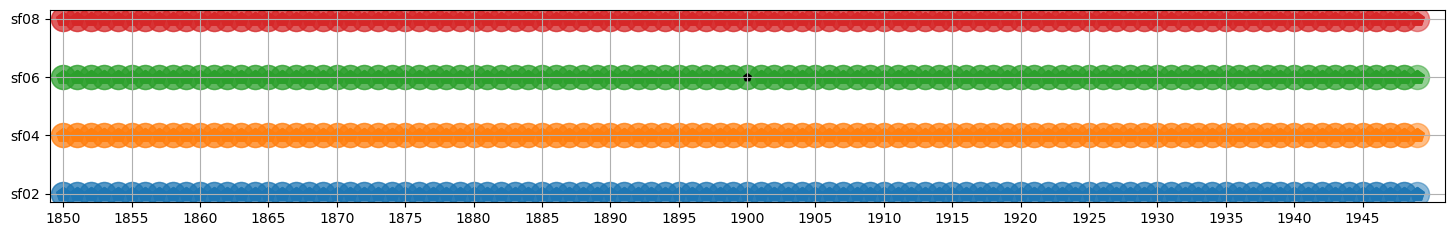

In [2]:
ctrl = '/perm/nkaj/ecearth/cmip6-fwf/runtime/classic/ctrl/output-control-files/sofiamip/faf-antwater-sofiamip'
subcmor = '/perm/nkaj/ecearth/processing/cmorize/sub-cmor.sh'

# ctrl = '/hpcperm/nkaj/ecearth/cmip6-fwf/runtime/classic/ctrl/output-control-files/sofiamip/faf-antwater-sofiamip'
# subcmor = '/hpcperm/nkaj/ecearth/processing/cmorize/sub-cmor.sh'

plt.figure(figsize=(18,2.5))
plt.grid()

for e, expn in enumerate(sofiamip_exps):
    # for y in range(1,100):
    dir_output = f'/ec/res4/scratch/nkaj/ecearth3/{expn}/output'
    for m, model in enumerate(['nemo', 'ifs']):
        ex = ['Omon/tos/gn','Amon/ua/gr'][m]
        dir_model = f'{dir_output}/{model}'
        # print(f'ECE {expn} {model}')
        ece_list = os.listdir(dir_model)
        ece_list.sort()
        ece_yrs = [int(x)+1849 for x in ece_list[:-1]]
        # print(ece_list)
        # print(ece_yrs)
        dir_cmor_ex = f'/ec/res4/scratch/nkaj/cmorized-results/{expn}/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/{ex}'
        cmor_list = []
        cmor_yrs = []
        
        if os.path.exists(dir_cmor_ex):
            for dir_cmor in os.listdir(dir_cmor_ex):
                print(dir_cmor)
                cmor_list_ = os.listdir(f'{dir_cmor_ex}/{dir_cmor}')
                cmor_list_.sort()
                cmor_list += cmor_list_
        cmor_yrs += [int(x[-9:-5]) for x in cmor_list]

        # print(cmor_list)
        # print(cmor_yrs)
        # print('')

        to_cmorize = [y for y in ece_yrs if y not in cmor_yrs]
        # print(to_cmorize)

        ! cd /perm/nkaj/ecearth/processing/cmorize/
        # ! cd /ec/res4/hpcperm/nkaj/cmorize/ece2cmor
        for y in to_cmorize:
            legn = f'{y-1849:03}'
            print(f'cmorizing {expn} {model} {legn} {ctrl} AOGCM')
            # ! sbatch {subcmor} {expn} {model} {legn} {ctrl} AOGCM
        
        plt.scatter(ece_yrs , len(ece_yrs)*[e] , c=f'C{e}', s=300, alpha=.5)
        plt.scatter(cmor_yrs, len(cmor_yrs)*[e], c=f'C{e}', s=100 , marker='p')
        plt.scatter(to_cmorize, len(to_cmorize)*[e], c=f'k', s=30 , marker='p')

plt.xlim((1849,1951));
plt.yticks(range(4), sofiamip_exps);
plt.xticks(np.arange(1850,1950,5));

In [12]:
# checking existence of raw and cmorized output folders
# the folders do not get deleted, however, when $SCRATCH is cleaned, so they will always show up when they've been created once
for e, expn in enumerate(sofiamip_exps):
    # for y in range(1,100):
    dir_ece = f'/ec/res4/scratch/nkaj/ecearth3/{expn}/output/nemo/'
    print(f'ECE {expn}')
    ece_list = os.listdir(dir_ece)
    ece_list.sort()
    ece_yrs = [int(x)+1849 for x in ece_list[:-1]]
    print(ece_list)
    print(ece_yrs)
    dir_cmor_ex = f'/ec/res4/scratch/nkaj/cmorized-results/{expn}/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/'
    print(os.listdir(dir_cmor_ex))

ECE sf02
['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', 'ofx-data']
[1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1

## enforcing all cmorized data to have a single version date

- I randomly picked `v20240404`
- there is also a script for that: `/ec/res4/hpcperm/nkaj/cmorize/ece2cmor3/ece2cmor3/scripts/data-qa/scripts/versions.sh`
```bash
Usage: $(basename $0) -l | -v <version> [-m] DIR

       -l            List versions present in DIR
       -v <version>  Set version to be used for all files
                     <version> must match: v20[0-9][0-9][01][0-9][0-9][0-9]
       -m            Safety switch: actually move files (dry-run if not set)
```
i.e.
- to list versions:`! /ec/res4/hpcperm/nkaj/cmorize/ece2cmor3/ece2cmor3/scripts/data-qa/scripts/versions.sh -l /ec/res4/scratch/nkaj/cmorized-results/`
       (this would list all versions of all experiments; the experiment subfolder can be specified)
- to dry-run `! /ec/res4/hpcperm/nkaj/cmorize/ece2cmor3/ece2cmor3/scripts/data-qa/scripts/versions.sh -v "v20240404" /ec/res4/scratch/nkaj/cmorized-results/sf02`
- to actually move `! /ec/res4/hpcperm/nkaj/cmorize/ece2cmor3/ece2cmor3/scripts/data-qa/scripts/versions.sh -m -v "v20240404" /ec/res4/scratch/nkaj/cmorized-results/sf02`

In [40]:
# listing the version present
for exp in sofiamip_exps:
    print(exp)
    ! /ec/res4/hpcperm/nkaj/cmorize/ece2cmor3/ece2cmor3/scripts/data-qa/scripts/versions.sh -l /ec/res4/scratch/nkaj/cmorized-results/{exp}

sf02
v20240404
sf04
v20240404
sf06
v20240404
sf08
v20240404


In [39]:
for exp in sofiamip_exps:
    print(exp)
    ! /ec/res4/hpcperm/nkaj/cmorize/ece2cmor3/ece2cmor3/scripts/data-qa/scripts/versions.sh -m -v "v20240404" /ec/res4/scratch/nkaj/cmorized-results/{exp}

sf02
Processing directory '/ec/res4/scratch/nkaj/cmorized-results/sf02/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/SImon/siconca/gr/v20240719'
renamed '/ec/res4/scratch/nkaj/cmorized-results/sf02/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/SImon/siconca/gr/v20240719/siconca_SImon_EC-Earth3_faf-antwater_r1i1p1f1_gr_191201-191212.nc' -> '/ec/res4/scratch/nkaj/cmorized-results/sf02/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/SImon/siconca/gr/v20240404/siconca_SImon_EC-Earth3_faf-antwater_r1i1p1f1_gr_191201-191212.nc'
rmdir: removing directory, '/ec/res4/scratch/nkaj/cmorized-results/sf02/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/SImon/siconca/gr/v20240719'
Processing directory '/ec/res4/scratch/nkaj/cmorized-results/sf02/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/Emon/mrsol/gr/v20240719'
renamed '/ec/res4/scratch/nkaj/cmorized-results/sf02/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/Emon/mrsol/gr/v20240719/mrsol_Emon_EC-Earth3_faf-antwate

In [41]:
# dir_cmor_ex = f'/ec/res4/scratch/nkaj/cmorized-results/{expn}/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/Omon/tos/gn/'

for e, expn in enumerate(sofiamip_exps):
    # for y in range(1,100):
    print(f'ECE experiment {expn}')
    dir_ece = f'/ec/res4/scratch/nkaj/ecearth3/{expn}/output/nemo/'
    ece_list = os.listdir(dir_ece)
    ece_list.sort()
    ece_yrs = [int(x)+1849 for x in ece_list[:-1]]
    print(ece_list)
    print(ece_yrs)
    dir_cmor_ex = f'/ec/res4/scratch/nkaj/cmorized-results/{expn}/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1'
    table_list = os.listdir(dir_cmor_ex)
    print(table_list)
    for table in table_list:
        if table in ['Ofx','fx']:
            continue
        exp_list = os.listdir(f'{dir_cmor_ex}/{table}')
        print(table, exp_list)
        for exp in exp_list:
            temp_dir = f'{dir_cmor_ex}/{table}/{exp_list[0]}'
            if os.path.exists(f'{temp_dir}/gn'):
                grid = 'gn'
            elif os.path.exists(f'{temp_dir}/gr'):
                grid = 'gr'
            else:
                raise ValueError('grid not gn or gr')
                            #   [grid]/[version]/[yearly_files.nc]
            date_list = os.listdir(f'{dir_cmor_ex}/{table}/{exp_list[0]}/{grid}/')
            print(date_list)
            for date in date_list:
                # if date!='v20230508':
                    # print number of files in directory
                print(f'{dir_cmor_ex}/{table}/{exp_list[0]}/{grid}/{date}', len(os.listdir(f'{dir_cmor_ex}/{table}/{exp_list[0]}/{grid}/{date}')))
                
    print('')

ECE experiment sf02
['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', 'ofx-data']
[1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 18

## moving files into convenient folder structure for uploading to SOFIAMIP archive
- shorter folder structure
```
/cmorized-results/sf02/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/  --> SOFIAMIP/antwater/r2i1p1f1/
/cmorized-results/sf04/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/  -->  SOFIAMIP/antwater/r4i1p1f1/
...
/cmorised-results/sdl2/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/  -->  SOFIAMIP/antwater-depth-lh/r2i1p1f3/
```
- rename files
```
[...]_faf-antwater_r1i1p1f1_[...].nc  -->  [...]_sofiamip-antwater_r[x]i1p1f1_[...].nc
```
    - faf-antwater -> sofia-antwater
    - simulation initialisation number as in Döscher et al


meaning of number in experiment name:
r: realisation (i.e. ensemble member)
i: initialisation method
p: physics
f: forcing


In [4]:
rename_dict = {
    'sf02': 'r2i1p1f1',
    'sf04': 'r4i1p1f1',
    'sf06': 'r6i1p1f1',
    'sf08': 'r8i1p1f1',
}

In [10]:
scratch_dir = '/ec/res4/scratch/nkaj'
for exp in sofiamip_exps:
    src_dir = f'{scratch_dir}/cmorized-results/{exp}/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/'
    dst_dir = f'{scratch_dir}/SOFIAMIP/antwater/{rename_dict[exp]}/'

    print(exp)
    print(src_dir)
    for dir in os.listdir(src_dir):
        print(dir)
        assert(os.path.exists(src_dir))
        # assert(os.path.exists(dst_dir))
        shutil.move(f'{src_dir}/{dir}', dst_dir)
    print(dst_dir)


sf02
/ec/res4/scratch/nkaj/cmorized-results/sf02/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/
Ofx
SImon
Emon
Omon
LImon
fx
Lmon
Amon
/ec/res4/scratch/nkaj/SOFIAMIP/antwater/r2i1p1f1/
sf04
/ec/res4/scratch/nkaj/cmorized-results/sf04/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/
Ofx
SImon
Emon
Omon
LImon
fx
Lmon
Amon
/ec/res4/scratch/nkaj/SOFIAMIP/antwater/r4i1p1f1/
sf06
/ec/res4/scratch/nkaj/cmorized-results/sf06/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/
Ofx
SImon
Emon
Omon
LImon
fx
Lmon
Amon
/ec/res4/scratch/nkaj/SOFIAMIP/antwater/r6i1p1f1/
sf08
/ec/res4/scratch/nkaj/cmorized-results/sf08/CMIP6/SOFIAMIP/KNMI/EC-Earth3/faf-antwater/r1i1p1f1/
Ofx
SImon
Emon
Omon
LImon
fx
Lmon
Amon
/ec/res4/scratch/nkaj/SOFIAMIP/antwater/r8i1p1f1/


In [22]:
old = '_faf-antwater_r1i1p1f1_'
for exp in sofiamip_exps:
    new = f'_sofiamip-antwater_{rename_dict[exp]}_'
    dst_dir = f'{scratch_dir}/SOFIAMIP/antwater/{rename_dict[exp]}/'
    for dirpath, dirs, files in os.walk(dst_dir):
        for file in files:
            if file.endswith('.nc') and os.path.exists(f'{dirpath}/{file}'):
                f = f'{dirpath}/{file}'
                os.rename(f, f.replace(old, new))